In [ ]:
from analysis_tools import Dataset, Process, Feature
from pprint import pprint

In [ ]:
vbf_sm_process = Process("vbf_sm", "VBFSM", color=(0, 0, 0))
vbf = Dataset("vbf_sm",
             "/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/",
             vbf_sm_process,
             prefix="cmsxrootd-1.gridka.de:1094/")

latino = Dataset("lat",
                "/store/group/phys_higgs/cmshww/amassiro/HWWNano/Autumn18_102X_nAODv7_Full2018v7/MCl1loose2018v7__MCCorr2018v7__l2loose__l2tightOR2018v7__JESTotalup_suffix/",
                vbf_sm_process,
                prefix="eoscms.cern.ch/")

pprint(latino.get_files()[0:10])

In [ ]:
ggf_sm_process = Process("ggf_sm", "GGFSM", color=(0, 0, 0))
ggf = Dataset("ggf_sm",
             "/store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/",
             ggf_sm_process,
             prefix="ingrid-se04.cism.ucl.ac.be:1094/")
# pprint(ggf.get_files()[0:])

In [ ]:
# Create dy process and dataset (whose files are in desy, so we must use xrootd)
dy_process = Process("dy", "DY", color=(255, 0, 0))
d = Dataset("dy_low", 
            "/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/",
            dy_process,
            prefix="dcache-cms-xrootd.desy.de:1094/"
           )
# let's see which files we are considering
# don't forget to voms-proxy before!
pprint(d.get_files()[0:])

In [ ]:
# lets plot stuff using ROOT RDataFrame
import ROOT
# ROOT.ROOT.EnableImplicitMT()
files = ggf.get_files()[0:1]
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
df = ROOT.RDataFrame("Events", dataframe_files)

#files = latino.get_files()[0:1]
#dataframe_files = ROOT.vector(str)()
#for f in files:
#    dataframe_files.push_back(f)
#lat_df = ROOT.RDataFrame("Events", dataframe_files)
#pprint ([col for col in df.GetColumnNames() if col not in lat_df.GetColumnNames()])

In [ ]:
print files

In [ ]:
print [col for col in df.GetColumnNames() if "daughter".lower() in col.lower()]

# DeepTau

### Tau_idDeepTau2017v2p1VSmu

bitmask 1 = VLoose, 2 = Loose, 4 = Medium, 8 = Tight

This actually translates to
1 = VLoose, 3 = Loose, 7 = Medium, 15 = Tight

### Tau_idDeepTau2017v2p1VSe 

bitmask 1 = VVVLoose, 2 = VVLoose, 4 = VLoose, 8 = Loose, 16 = Medium, 32 = Tight, 64 = VTight, 128 = VVTight*

 1, 3, 7, 15, 31, 63, 127, 255

### Tau_idDeepTau2017v2p1VSjet

bitmask 1 = VVVLoose, 2 = VVLoose, 4 = VLoose, 8 = Loose, 16 = Medium, 32 = Tight, 64 = VTight, 128 = VVTight*

 1, 3, 7, 15, 31, 63, 127, 255


In [ ]:
ROOT.gInterpreter.Declare("""
    bool is_wp(unsigned char v, int initial, int final){
         if ((int(v) >= int(std::pow(2, initial)) - 1) && (int(v) <= int(std::pow(2, final)) - 1)) return true;
         return false;
    }
""")

ROOT.gInterpreter.Declare("""
    using Vchar = const ROOT::RVec<unsigned char>&;
    ROOT::RVec<unsigned char> vec_wp(Vchar v, int initial, int final){
        ROOT::RVec<unsigned char> a;
        for (size_t i = 0; i < v.size(); i++) {
            if (is_wp(v[i], initial, final)) a.push_back(v[i]);
        }
        return a;
    }
""")

In [ ]:
c = ROOT.TCanvas("", "", 800, 800)
#hist2 = df.Define("loose_vs_mu", 'wp(Tau_idDeepTau2017v2p1VSmu, (unsigned char*)("Loose"))').Histo1D("loose_vs_mu")
#new_df = df.Filter("Tau_idDeepTau2017v2p1VSmu[(Tau_idDeepTau2017v2p1VSmu & 3) > 0]")
histo3 = df.Define("wp","vec_wp(Tau_idDeepTau2017v2p1VSmu, 1, 2)").Histo1D("wp")
histo3.Draw()
c.Draw()

In [ ]:
ROOT.gInterpreter.Declare("""
    using VBool = const ROOT::RVec<Bool_t>&;
    using Vint = const ROOT::RVec<int>&;
    ROOT::RVec<int> get_dm(Vint dm){
        ROOT::RVec<int> int_dm;
        for (int i = 0; i < dm.size(); i++){
            if (dm[i]) int_dm.push_back(1);
            else int_dm.push_back(0);
        }
        return int_dm;
    }
""")

In [ ]:
c = ROOT.TCanvas("", "", 800, 800)
histo7 = df.Define("dm", "get_dm(Tau_idDecayModeNewDMs)").Histo1D("dm")
histo7.Draw()
c.Draw()

In [ ]:
ROOT.gSystem.Load("../HHKinFit2/libHHKinFit2.so")
ROOT.gInterpreter.Declare('#include "/afs/cern.ch/work/j/jleonhol/private/cms_phys_ciemat/analysis_tools/HHKinFit2/interface/HHKinFitMasterHeavyHiggs.h"')


In [8]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;
    using Vint = const ROOT::RVec<int>&;
    float gen_part_inv_mass(Vfloat inp_pt, Vfloat inp_eta, Vfloat inp_phi, Vfloat inp_mass, Vint inp_id, int id){
        ROOT::RVec<float> pt, eta, phi, mass;
        for (size_t i = 0; i < inp_pt.size(); i++) {
            if (abs(inp_id[i]) == id) {
                pt.push_back(inp_pt[i]);
                eta.push_back(inp_eta[i]);
                phi.push_back(inp_phi[i]);
                mass.push_back(inp_mass[i]);
            }
        }
        if (pt.size() != 2) return -1;
        return InvariantMass(pt, eta, phi, mass);
    }
""")

True

In [9]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;
    using Vint = const ROOT::RVec<int>&;
    int nGen(Vint inp_id, int id){
        int n = 0;
        for (size_t i = 0; i < inp_id.size(); i++) {
            if (abs(inp_id[i]) == id) {
                n++;
            }
        }
        return n;
    }
""")

True

In [12]:
# invariant mass from the two taus
df_ditau = df.Filter("nGenVisTau == 2")
hmodel = ("Ditau_mass","Ditau Mass [GeV]",50, 0, 500.)
ditau_mass = df_ditau.Define("Ditau_mass", "InvariantMass(Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "Ditau_mass")
ditau_mass_eta = df_ditau.Define("Ditau_mass_eta", "InvariantMass(Tau_pt[abs(Tau_eta) < 2.1], Tau_eta[abs(Tau_eta) < 2.1], Tau_phi[abs(Tau_eta) < 2.1], Tau_mass[abs(Tau_eta) < 2.1])").Histo1D(hmodel, "Ditau_mass_eta")
digentau_mass = df_ditau.Define("Digentau_mass", "InvariantMass(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "Digentau_mass")
digenparttau_mass = df_ditau.Define("Digenparttau_mass", "gen_part_inv_mass(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 15)").Histo1D(hmodel, "Digenparttau_mass")

hmodel = ("nTau","nTau",5, 0, 5.)
nTau = df.Histo1D(hmodel, "nTau")
nGenVisTau = df.Histo1D(hmodel, "nGenVisTau")
nGenTau = df.Define("nGenTau", "nGen(GenPart_pdgId, 15)").Histo1D(hmodel, "nGenTau")

#nGenPart = df.Histo1D(hmodel, "nGenPart")

In [10]:
# What happens to the invariant mass if we only have 1 tau?
df_monotau = df.Filter("nGenVisTau == 1").Filter("nTau == 1")
hmodel = ("monotau_mass","monotau Mass [GeV]",10, -5, 5.)
tau_mass = df_monotau.Define("tau_mass", "InvariantMass(Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "tau_mass")
gentau_mass = df_monotau.Define("gentau_mass", "InvariantMass(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "gentau_mass")

In [5]:
hmodel = ("tau_eta","tau_eta; eta; events",50, -5, 5.)
Tau_eta = df.Histo1D(hmodel, "Tau_eta")
GenVisTau_eta = df.Histo1D(hmodel, "GenVisTau_eta")


In [ ]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;      
    float leading_pt(Vfloat pt){
        if (pt.size() < 1) return -1;
        if (pt.size() == 1) return pt[0];
        if (pt[1] > pt[0]) return pt[1];
        else return pt[0];
    }
    float subleading_pt(Vfloat pt){
        if (pt.size() < 2) return -1;
        if (pt[0] > pt[1]) return pt[1];
        else return pt[0];
    }
""")

In [ ]:
hmodel = ("Leading_tau_pt","Leading_tau_pt [GeV]",25, 0, 200.)
lead_tau_pt = df_ditau.Define("lead_tau_pt", "leading_pt(Tau_pt)").Histo1D(hmodel, "lead_tau_pt")
lead_gentau_pt = df_ditau.Define("lead_gentau_pt", "leading_pt(GenVisTau_pt)").Histo1D(hmodel, "lead_gentau_pt")

hmodel = ("Subleading_tau_pt","subleading_tau_pt [GeV]",25, 0, 200.)
sublead_tau_pt = df_ditau.Define("sublead_tau_pt", "subleading_pt(Tau_pt)").Histo1D(hmodel, "sublead_tau_pt")
sublead_gentau_pt = df_ditau.Define("sublead_gentau_pt", "subleading_pt(GenVisTau_pt)").Histo1D(hmodel, "sublead_gentau_pt")


In [38]:
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> deltaRGenReco(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2){
        ROOT::RVec<float> deltaR;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                deltaR.push_back(fabs(v1.DeltaR(v2)));
            }
        }
        return deltaR;
    }
""")

True

In [ ]:
hmodel = ("deltaR_gen_reco","deltaR(Gen, Reco) [GeV]", 100, 0, 5.)
deltar_gen_reco = df_ditau.Define("deltar_gen_reco", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "deltar_gen_reco")
hmodel = ("deltaR_gen_reco","deltaR(Gen, Reco) [GeV]", 100, 0, 0.1)
deltar_gen_reco_zoomed = df_ditau.Define("deltar_gen_reco", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "deltar_gen_reco")


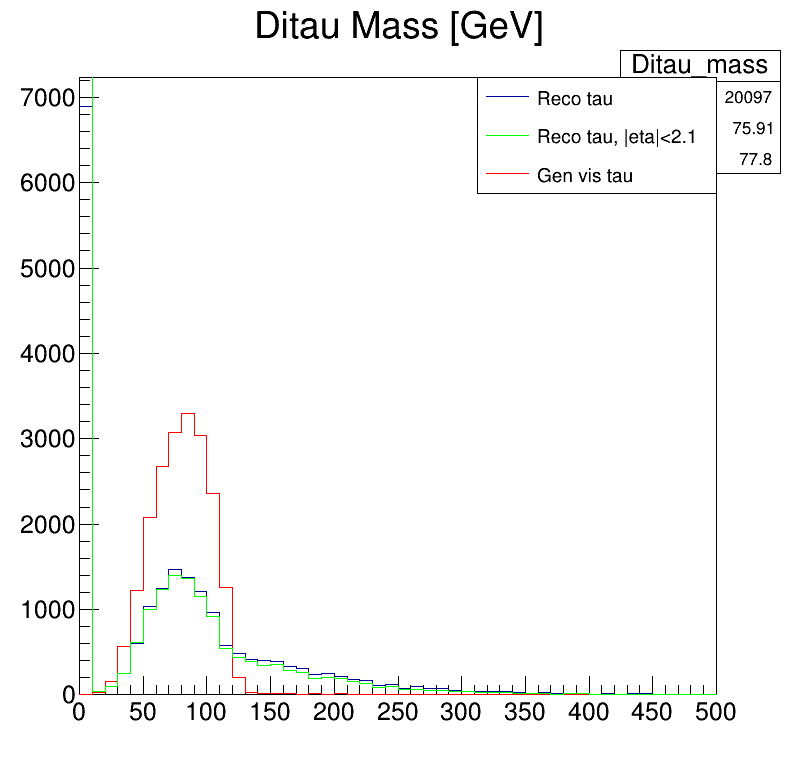

In [19]:
# invariant mass from the two taus
c = ROOT.TCanvas("", "", 800, 800)

#h3 = digenparttau_mass.Clone()



h1 = ditau_mass.Clone()
h1.Draw("same")
h2 = digentau_mass.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")


h3 = ditau_mass_eta.Clone()
h3.SetLineColor(ROOT.kGreen)
h3.Draw("same")


leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h3, "Reco tau, |eta|<2.1", "l")
leg.AddEntry(h2, "Gen vis tau", "l")


leg.Draw("same")
c.Draw()

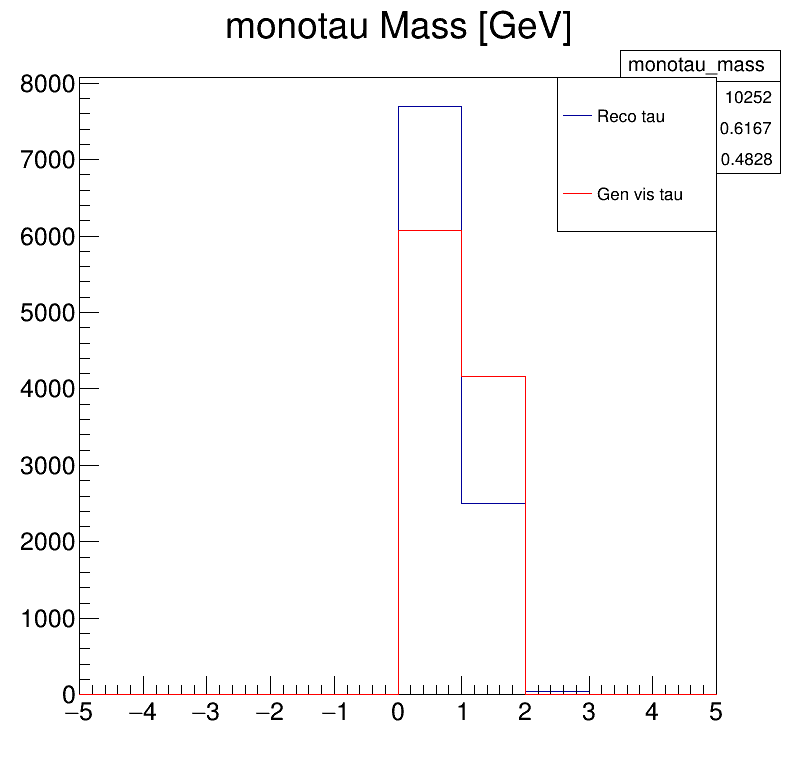

In [11]:
# invariant mass from the mono tau
c = ROOT.TCanvas("", "", 800, 800)

h1 = tau_mass.Clone()
h1.Draw("same")
h2 = gentau_mass.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")




leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h2, "Gen vis tau", "l")

leg.Draw("same")
c.Draw()

In [ ]:
# leading pt
c = ROOT.TCanvas("", "", 800, 800)
h1 = lead_tau_pt.Clone()
h1.Draw()
h2 = lead_gentau_pt.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")
leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

leg.Draw("same")
c.Draw()

In [ ]:
# subleading pt
c = ROOT.TCanvas("", "", 800, 800)
h1 = sublead_tau_pt.Clone()

h2 = sublead_gentau_pt.Clone()
h2.SetLineColor(ROOT.kRed)
if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw()
    h2.Draw("same")
else:
    h2.Draw()
    h1.Draw("same")
leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

leg.Draw("same")
c.Draw()

In [ ]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco.Clone()
h1.Draw()
c.Draw()

In [ ]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_zoomed.Clone()
h1.Draw()
c.Draw()

In [6]:
# seems that cutting in 0.1 is a good idea. Let's use this cut to obtain eff vs gen pt
# let's define a function that returns the efficient pts
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> efficient_gen_pts(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2, float threshold){
        ROOT::RVec<float> efficient_pts;
        int used_j = -1;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                if (j == used_j) continue;
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                if (fabs(v1.DeltaR(v2)) < threshold) {
                  efficient_pts.push_back(pt1[i]);
                  used_j = j;
                  break;
                }
            }
        }
        return efficient_pts;
    }
""")


True

In [13]:
hmodel = ("Pt","Gen Pt [GeV]", 50, 0, 200.)
efficient_gen_pts = df_ditau.Define("efficient_gen_pts", "efficient_gen_pts(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass, Tau_pt, Tau_eta, Tau_phi, Tau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_pts")
efficient_gen_pts_eta = df_ditau.Define("efficient_gen_pts_eta", "efficient_gen_pts(GenVisTau_pt[abs(GenVisTau_eta) < 2.1], GenVisTau_eta[abs(GenVisTau_eta) < 2.1], GenVisTau_phi[abs(GenVisTau_eta) < 2.1], GenVisTau_mass[abs(GenVisTau_eta) < 2.1], Tau_pt, Tau_eta, Tau_phi, Tau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_pts_eta")

all_gen_pts = df_ditau.Histo1D(hmodel, "GenVisTau_pt")
all_gen_pts_eta = df_ditau.Define("GenVisTau_pt_eta", "GenVisTau_pt[abs(GenVisTau_eta)<2.1]").Histo1D(hmodel, "GenVisTau_pt_eta")

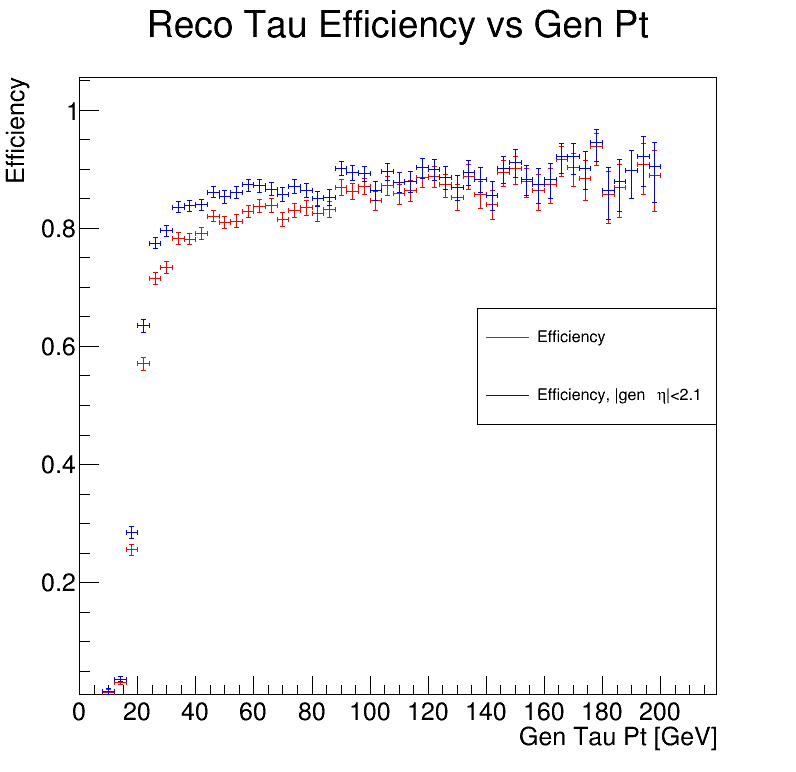

In [27]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_gen_pts.Clone()
h2 = all_gen_pts.Clone()

h3 = efficient_gen_pts_eta.Clone()
h4 = all_gen_pts_eta.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)
eff_eta = ROOT.TEfficiency(h3, h4)
eff_eta.SetLineColor(ROOT.kBlue)

eff.SetTitle("Reco Tau Efficiency vs Gen Pt; Gen Tau Pt [GeV]; Efficiency")



leg = ROOT.TLegend(0.6, 0.45, 0.9, 0.6)
leg.AddEntry(eff, "Efficiency", "l")
leg.AddEntry(eff_eta, "Efficiency, |gen #eta|<2.1", "l")

eff.Draw()
eff_eta.Draw("same")
leg.Draw("same")
# h2.Draw()
# h1.Draw("same")
c.Draw()

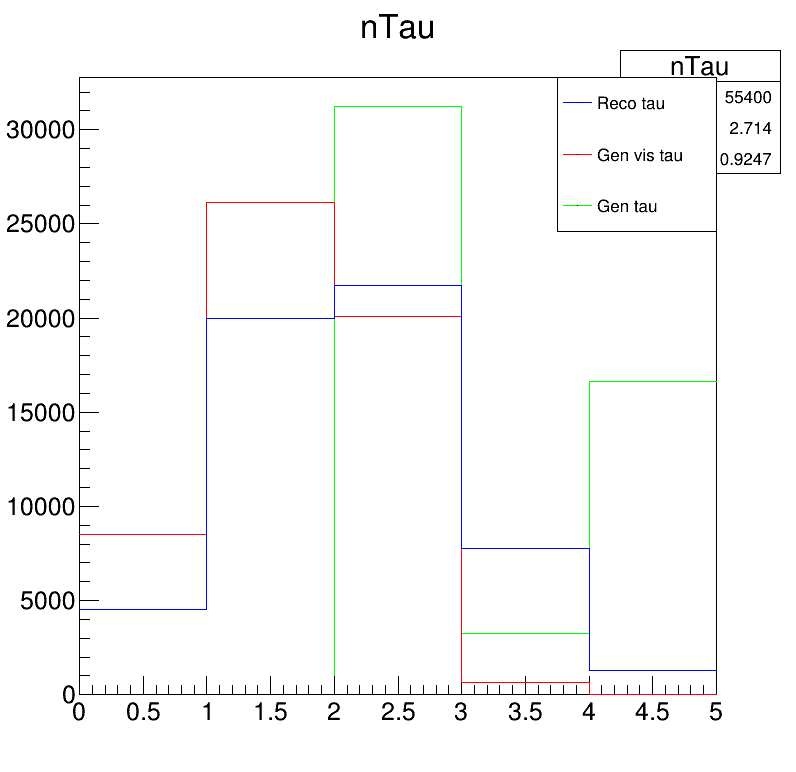

In [22]:
# Distribution of nTau and nGenTau
c = ROOT.TCanvas("", "", 800, 800)
h1 = nTau.Clone()
h2 = nGenVisTau.Clone()
h3 = nGenTau.Clone()
#h4 = nGenPart.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
#h4.SetLineColor(ROOT.kBlack)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")
leg.AddEntry(h3, "Gen tau")
#leg.AddEntry(h4, "Gen part")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    if h1.GetMaximum() > h3.GetMaximum():
        h1.Draw("same")
        h2.Draw("same")
        h3.Draw("same")
    else:
        h3.Draw("same")
        h2.Draw("same")
        h1.Draw("same")
elif h2.GetMaximum() > h3.GetMaximum():
        h2.Draw("same")
        h1.Draw("same")
        h3.Draw("same")
else:
    h3.Draw("same")
    h2.Draw("same")
    h1.Draw("same")
    
leg.Draw()
c.Draw()

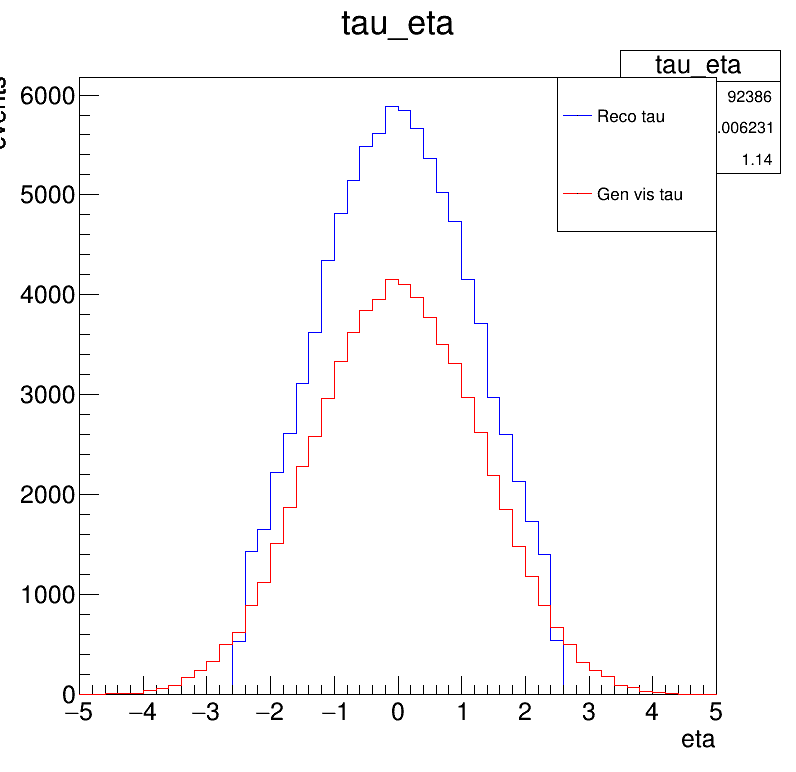

In [7]:
# Distribution of Tau_eta and GenVisTau_eta
c = ROOT.TCanvas("", "", 800, 800)
h1 = Tau_eta.Clone()
h2 = GenVisTau_eta.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")    
   
leg.Draw()
c.Draw()

# btag

Our samples is from RunIIAutumn18, so the WPs must be taken from https://twiki.cern.ch/twiki/bin/viewauth/CMS/BtagRecommendation102X

|WP | Value|
| --- | --- |
|loose | 	0.0494 |
|medium |	0.2770 |
|tight |	0.7264 |

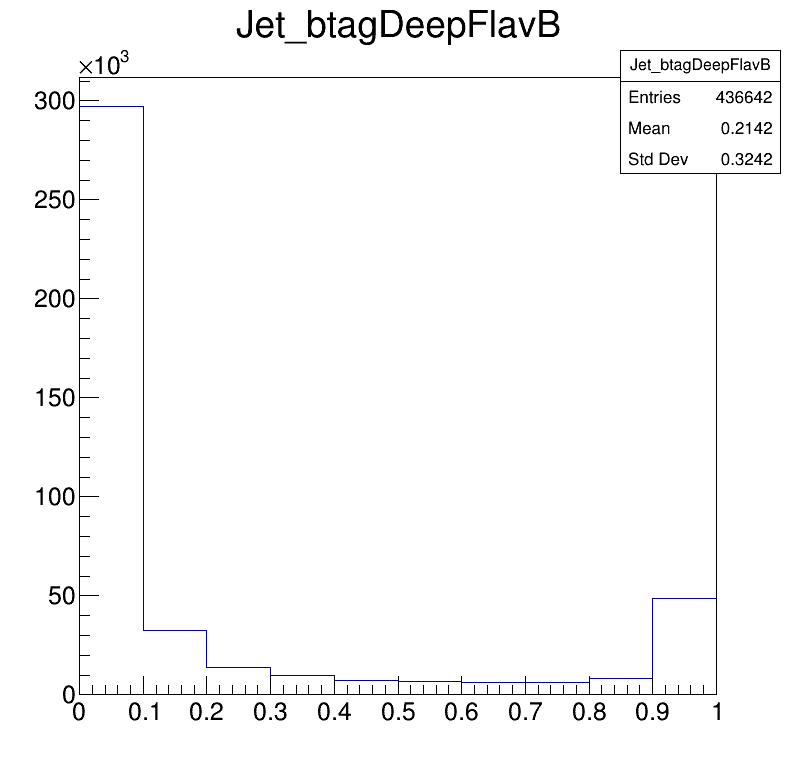

In [31]:


hmodel = ("Jet_btagDeepFlavB","Jet_btagDeepFlavB", 10, 0, 1)
Jet_btagDeepFlavB = df.Histo1D(hmodel, "Jet_btagDeepFlavB")
c = ROOT.TCanvas("", "", 800, 800)
Jet_btagDeepFlavB.Draw()
c.Draw()

In [41]:
hmodel = ("deltaR_jet","deltaR(GenJet, Jet) [GeV]", 100, 0, 5.)
deltar_gen_reco_jet = df.Define("deltar_gen_reco_jet", "deltaRGenReco(Jet_pt, Jet_eta, Jet_phi, Jet_mass, GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass)").Histo1D(hmodel, "deltar_gen_reco_jet")
hmodel = ("deltaR_jet","deltaR(GenJet, Jet) [GeV]", 100, 0, 0.5)
deltar_gen_reco_jet_zoomed = df.Define("deltar_gen_reco_jet", "deltaRGenReco(Jet_pt, Jet_eta, Jet_phi, Jet_mass, GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass)").Histo1D(hmodel, "deltar_gen_reco_jet")

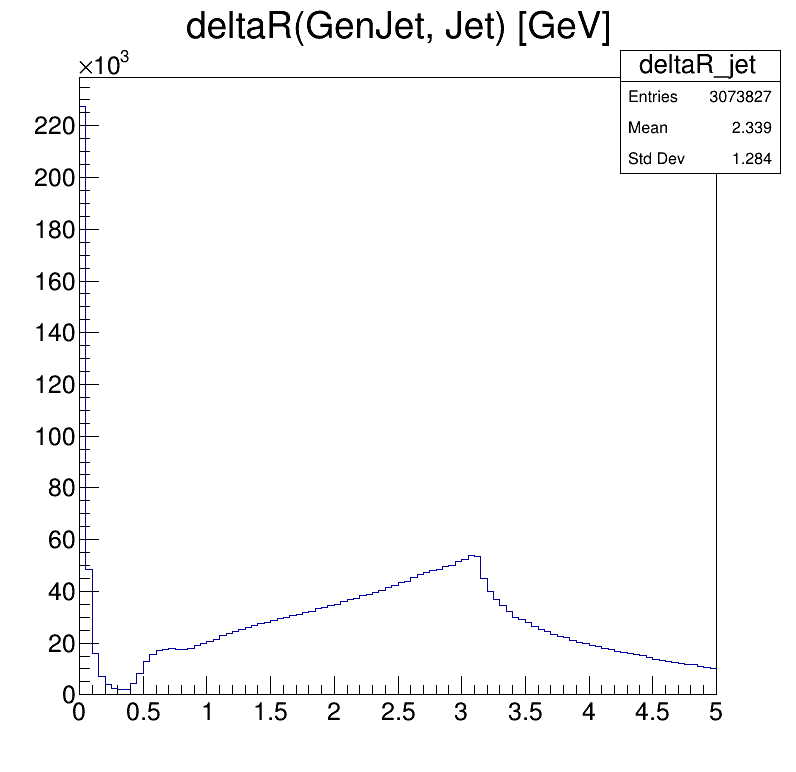

In [40]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_jet.Clone()
h1.Draw()
c.Draw()

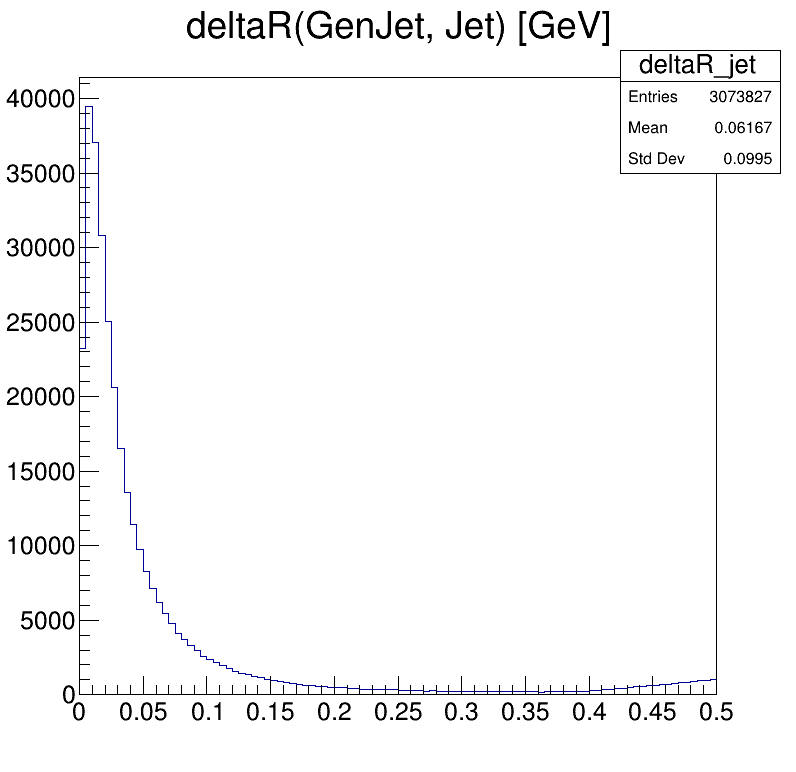

In [42]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_jet_zoomed.Clone()
h1.Draw()
c.Draw()

In [10]:
# lets take 0.3 as limit
# seems that cutting in 0.1 is a good idea. Let's use this cut to obtain eff vs gen pt


In [18]:
hmodel = ("Pt","Gen Pt [GeV]", 50, 0, 200.)
efficient_genjet_pts = df.Define("efficient_genjet_pts", "efficient_gen_pts(GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass, Jet_pt, Jet_eta, Jet_phi, Jet_mass, 0.3)").Histo1D(hmodel, "efficient_genjet_pts")
all_genjet_pts = df.Histo1D(hmodel, "GenJet_pt")

efficient_genb_pts = df.Define("efficient_genb_pts", "efficient_gen_pts(GenJet_pt[GenJet_hadronFlavour==5], GenJet_eta[GenJet_hadronFlavour==5], GenJet_phi[GenJet_hadronFlavour==5], GenJet_mass[GenJet_hadronFlavour==5], Jet_pt[Jet_btagDeepFlavB > 0.2770], Jet_eta[Jet_btagDeepFlavB > 0.2770], Jet_phi[Jet_btagDeepFlavB > 0.2770], Jet_mass[Jet_btagDeepFlavB > 0.2770], 0.3)").Histo1D(hmodel, "efficient_genb_pts")
all_genb_pts = df.Define("genb_pts", "GenJet_pt[GenJet_hadronFlavour==5]").Histo1D(hmodel, "genb_pts")

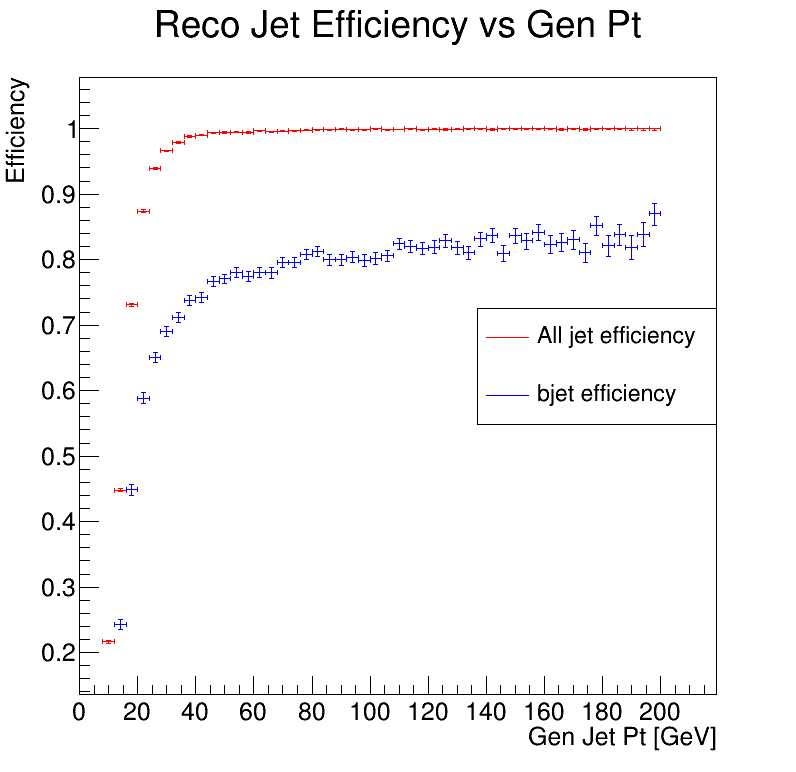

In [28]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_genjet_pts.Clone()
h2 = all_genjet_pts.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)

eff.SetTitle("Reco Jet Efficiency vs Gen Pt; Gen Jet Pt [GeV]; Efficiency")

h3 = efficient_genb_pts.Clone()
h4 = all_genb_pts.Clone()

eff2 = ROOT.TEfficiency(h3, h4)
eff2.SetLineColor(ROOT.kBlue)


leg = ROOT.TLegend(0.6, 0.45, 0.9, 0.6)
leg.AddEntry(eff, "All jet efficiency", "l")
leg.AddEntry(eff2, "bjet efficiency", "l")

eff.Draw()
eff2.Draw("same")
leg.Draw()
#h2.Draw()
#h1.Draw("same")
c.Draw()